# Mapping a Quantum System

Our framework introduces a universal template for mapping quantum systems, emphasizing adaptability to accommodate everything from the simplicity of the Rabi model to the intricacies of topological structures. This model stands out for its approach to decompose quantum phenomena into elements of complexity and counter-complexity, offering fresh perspectives and potential breakthroughs in quantum understanding.

## Factors in a Quantum System: Complexity and Counter-Complexity

To accurately map any quantum system, our model defines two pivotal factors: Complexity and Counter-Complexity. For instance:

- Rabi Model: Complexity is embodied by the Qubit, with the Cavity as Counter-Complexity.
- Topological Model: Complexity manifests in the Anyon, opposed by the Quantum Field as Counter-Complexity.
- Quantum Harmonic Oscillator: Complexity is the Mass on a Spring, and Counter-Complexity is Quantum Vacuum Fluctuations.
- Quantum Ising Model: Complexity is the Spin System, and Counter-Complexity is an External Magnetic Field.

# Classical Analogy and Energy Exchange

The interplay of Complexity and Counter-Complexity within our quantum system mapping is analogous to the fundamental principles of classical physics, particularly echoing the essence of Newton's Third Law, where every action has an equal and opposite reaction. This notion is a cornerstone in our model, where Complexity and Counter-Complexity engage in a continuous and dynamic exchange of energy, behaving as interconnected aspects of a singular quantum system.

Consider the Rabi model, where the qubit represents Complexity, engaging in an intricate dance with the cavity, its Counter-Complexity counterpart. These two elements of the quantum system are in constant communication, trading energy at a rapid rate, orchestrated by the Interaction term – in this context, the Rabi oscillations. This term is crucial, as it defines the nature and nuances of the energy exchange.

![Quantum System Energy Exchange](energyexchange.png)

The elegance of this model lies in its symmetry; the peaks of energy in Complexity are mirrored by troughs in Counter-Complexity. This symphony of energy showcases the foundational rhythm of quantum systems, as dictated by our novel approach to Complexity and Counter-Complexity.

# Basic Energy Mapping Equation

We use the following equation as the foundational structure for mapping the quantum system's energy:


$ E_{\text{total}} = E_{\text{complexity}} + E_{\text{counter-complexity}} + E_{\text{interaction}} $

where each term is defined as follows:

- `E_complexity = ω_complexity × <Operator_complexity>`
- `E_counter-complexity = ω_counter-complexity × <Operator_counter-complexity>`
- `E_interaction = g × <Interaction Operator>`

## Deep Dive into E Interaction

### Equation Refinement

Calculating `E_interaction`:

- `E_interaction = E_total - (E_complexity + E_counter-complexity)`

This will always be true.

A second way to calculate it is by the Hamiltonian.

- `E_interaction = g × <Interaction Operator>`

If these values are not the same, then you have a problem with your model.

For a more nuanced understanding, we can also calculate `E_interaction` in our model as:
$ E_{\text{interaction}}' = \alpha \cdot E_{\text{total}} - \beta \cdot E_{\text{complexity}} - \gamma \cdot E_{\text{counter-complexity}} + \delta \cdot \langle \sigma_z \rangle + \ldots $


### Coefficients and Implications

In the provided notebook with the default settings, the coefficients are calculated as:

$
\begin{align*}
E_{\text{complexity}} &= -3.227591 \times 10^{-1}, \\
E_{\text{countercomplexity}} &= -9.999998 \times 10^{-1}, \\
\sigma_x &= -4.313176 \times 10^{-16}, \\
\sigma_y &= -1.778138 \times 10^{-15}, \\
E_{\text{total}} &= 9.999998 \times 10^{-1}, \\
\sigma_z &= -6.772407 \times 10^{-1}, \\
\text{Y-Intercept} &= 0.6772406786304398
\end{align*}
$

These coefficients suggest:
1. Strong contributions from α, β, γ, indicating that these elements are nearly equally weighted.
2. Minimal contribution from δ, implying its lesser role in the interaction term.

Data saved to quantum_simulation_data.csv


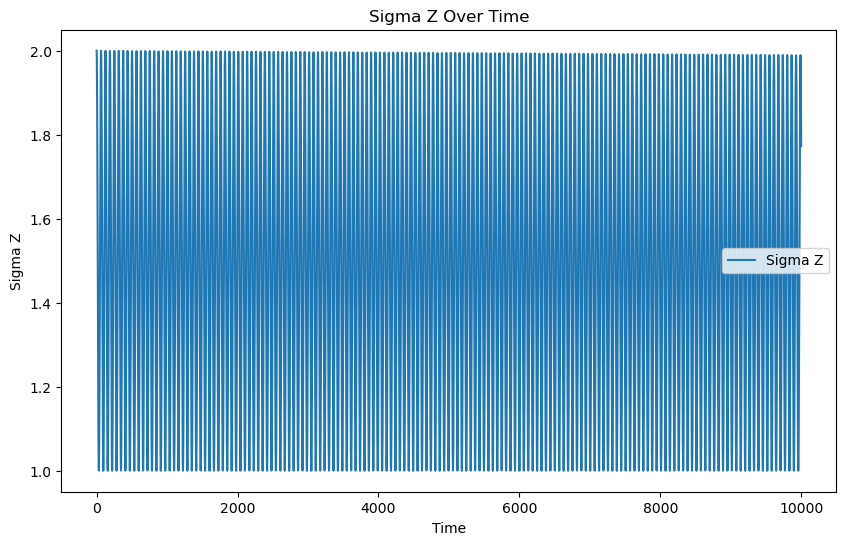

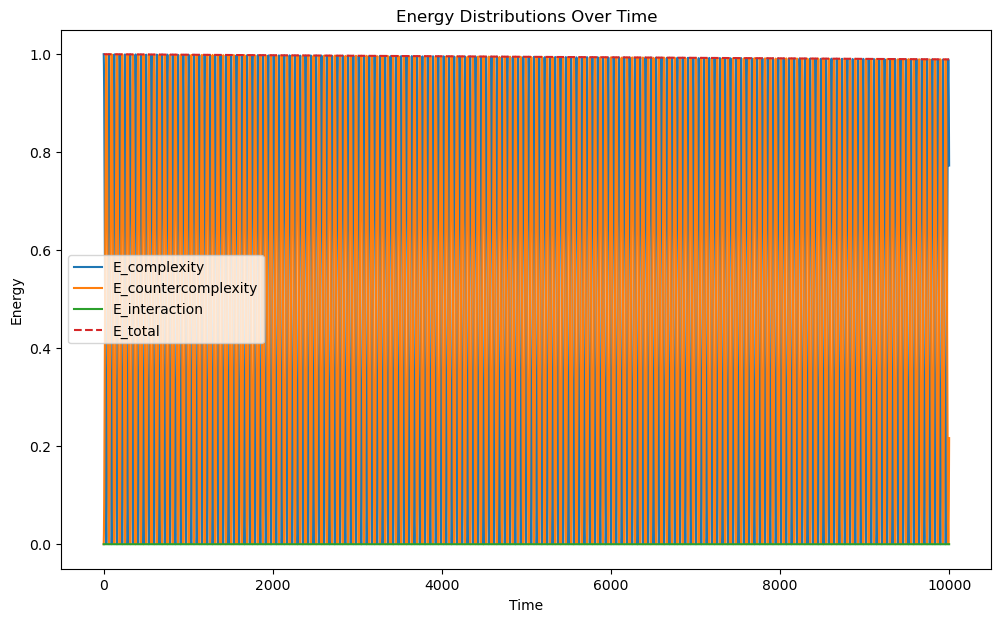

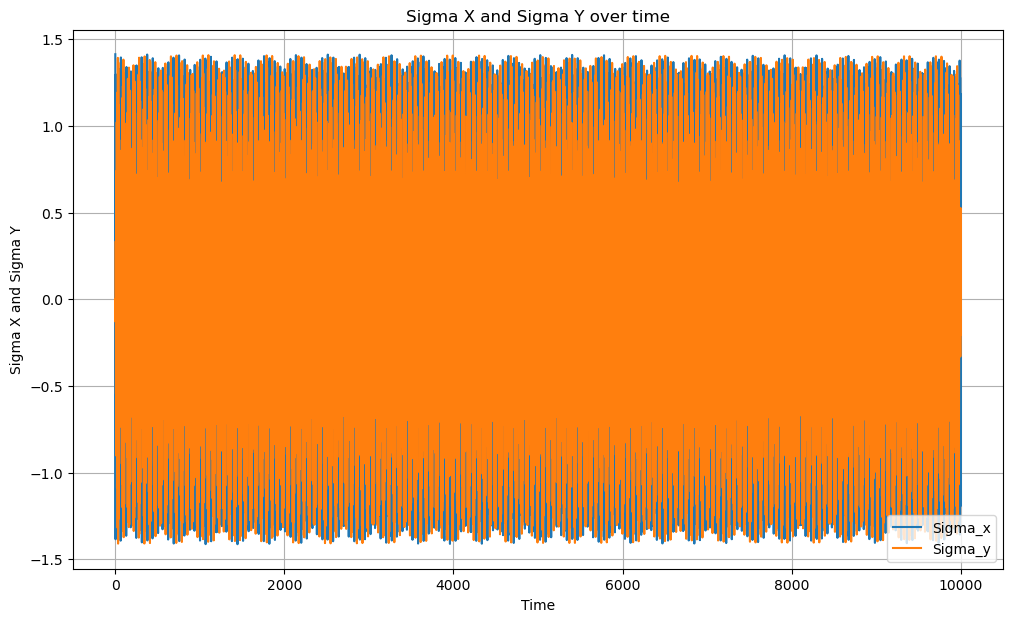

In [313]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def initialize_system(N, alpha):
    # Operators
    a = tensor(destroy(N), qeye(N))
    adag = a.dag()
    b = tensor(qeye(N), destroy(N))
    bdag = b.dag()

    # Position Operators
    sigma_x = tensor(position(N), qeye(N))
    sigma_y = tensor(qeye(N), position(N))
    sigma_z = tensor(Qobj(np.diag(np.arange(1, N+1))), qeye(N))

    # Initial state
    psi0 = tensor(coherent(N, alpha), basis(N, 0))

    return a, adag, b, bdag, sigma_x, sigma_y, sigma_z, psi0

# Constants
omega_complexity = 1  
omega_countercomplexity = 1  
g = 0.05  
N = 20
alpha = 1  
tlist = np.linspace(0, 10000, 10000)

# Initialize the system
a, adag, b, bdag, sigma_x, sigma_y, sigma_z, psi0 = initialize_system(N, alpha)

# Hamiltonian
H = omega_complexity * adag * a + omega_countercomplexity * bdag * b + g * (adag * b + a * bdag)

# Expectation operators
e_ops = [adag * a,  # Number operator for 'a' mode
         bdag * b,  # Number operator for 'b' mode
         g * (adag * b + a * bdag),  # E_interaction
         H,  # E_total
         sigma_x
         ,  # Sigma_x
         sigma_y,  # Sigma_y
         sigma_z,  # Sigma_z
         omega_complexity * adag * a,  # E_complexity
         omega_countercomplexity * bdag * b]  # E_countercomplexity

# Time evolution
output = mesolve(H, psi0, tlist, [], e_ops)

# Extracting number operator values and position expectation values
n_a = output.expect[0]
n_b = output.expect[1]
E_interaction = output.expect[2]
E_total = output.expect[3]
exp_sigma_x = output.expect[4]
exp_sigma_y = output.expect[5]
exp_sigma_z = output.expect[6]
E_complexity = output.expect[7]
E_countercomplexity = output.expect[8]

# Create a DataFrame to store the data
data = {
    'Time': tlist,
    'E_complexity': E_complexity,
    'E_countercomplexity': E_countercomplexity,
    'E_interaction': E_interaction,
    'E_total': E_total,
    'Sigma_x': exp_sigma_x,
    'Sigma_y': exp_sigma_y,
    'Sigma_z': exp_sigma_z,
    'N_a': n_a,
    'N_b': n_b
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
filename = "quantum_simulation_data.csv"
df.to_csv(filename, index=False)
print(f"Data saved to {filename}")

# Plotting the Sigma Z over time
plt.figure(figsize=(10, 6))
plt.plot(tlist, output.expect[6], label='Sigma Z')
plt.xlabel('Time')
plt.ylabel('Sigma Z')
plt.title('Sigma Z Over Time')
plt.legend()
plt.show()

# Plotting the energy distributions over time
plt.figure(figsize=(12, 7))
plt.plot(tlist, E_complexity, label='E_complexity')
plt.plot(tlist, E_countercomplexity, label='E_countercomplexity')
plt.plot(tlist, E_interaction, label='E_interaction')
plt.plot(tlist, E_total, label='E_total', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Distributions Over Time')
plt.legend()
plt.show()

# Plotting the Sigma X and Sigma Y over time
plt.figure(figsize=(12, 7))
plt.plot(tlist, exp_sigma_x, label='Sigma_x')
plt.plot(tlist, exp_sigma_y, label='Sigma_y')
plt.xlabel('Time')
plt.ylabel('Sigma X and Sigma Y')
plt.title('Sigma X and Sigma Y over time')
plt.legend()
plt.grid(True)
plt.show()


Introduction to the Mediator Term in Quantum System Modeling
Overview
In our pursuit to model quantum systems accurately, we introduce a novel concept: the "mediator term." This term is pivotal in mapping the intricate relationships within the quantum system, particularly focusing on the positional data aspects, namely sigma x and sigma y.

Conceptualizing the Mediator Term
The mediator term is a unique construct in our model, designed to enhance the linear relationship between the components of the quantum system. It acts as a bridge, merging various elements to create a more cohesive and interpretable model.

Role in the Model
Integrating Sigma X and Sigma Y: Sigma x and sigma y represent key positional variables in our quantum system model. The mediator term harmonizes these variables, creating a unified framework that reflects their combined influence on the system.
Facilitating Linear Relationships: By amalgamating sigma x and sigma y, the mediator term helps to linearize the relationships within the model. This is crucial for simplifying complex quantum interactions into a more understandable form.
The Four-State Influence
In our model, sigma x and sigma y contribute to the system's energy exchange through four distinct states, each representing a different mode of influence:

State 1 - Sigma X Influence: Represents the individual impact of sigma x on the system.
State 2 - Sigma Y Influence: Signifies the sole contribution of sigma y.
State 3 - Combined Sigma X and Y Influence: Illustrates the combined effect of sigma x and y, offering a more comprehensive view of their joint impact.
State 4 - Reinforced Influence: Focuses on the amplified effect when both sigma x and sigma y, along with their combined influence, simultaneously affect the system.
These states collectively ensure that our model captures the full spectrum of influences exerted by sigma x and sigma y, providing a more accurate representation of the quantum system.

Justification of the Mediator Term
The mediator term is not just a mathematical convenience; it's a conceptual necessity. In quantum systems, where interactions are often non-linear and complex, traditional modeling approaches can fall short. The mediator term addresses this by:

Enhancing Model Clarity: It simplifies the complex dynamics into a more linear, understandable framework without losing the essence of quantum interactions.
Ensuring Comprehensive Coverage: The term encapsulates the multifaceted influences within the system, ensuring no aspect of the interaction is overlooked.
Conclusion
The introduction of the mediator term in our quantum system model is a step towards demystifying the complex interplay of elements in quantum mechanics. It stands as a testament to our commitment to creating models that are not only accurate but also intuitively understandable, paving the way for more profound insights into the quantum realm.

In [328]:
import pandas as pd

# Load the dataset
df = pd.read_csv('quantum_simulation_data.csv')

# Create the mediator terms for Sigma_x and Sigma_y
df['Mediator_Term_X'] = df['Sigma_x'] + df['Sigma_y']
df['Mediator_Term_Y'] = df['Sigma_x'] + df['Sigma_y']

# Save the updated dataframe back to the CSV file
df.to_csv('quantum_simulation_data.csv', index=False)

# Defining E_interaction Term

## Introduction

In this section, we fully define the `E_interaction` term, bringing us one step closer to fully incorporating the experimental data into the model.

## Code Overview

The provided code accomplishes the following:

1. Imports necessary libraries.
2. Loads the processed and sorted data from the CSV file.
3. Defines the feature set and the target variable for the model.
4. Splits the dataset into training and testing sets.
5. Trains a linear regression model on the training set.
6. Makes predictions on the testing set.
7. Evaluates the model using mean squared error (MSE) and R-squared.
8. Prints out model evaluation metrics.
9. Prints out model coefficients for each feature.
10. Prints out the y-intercept of the model.

## Discussion

### Feature Set

The features list contains all the predictor variables used for predicting `E_interaction`. These include various quantum parameters like complexity, counter-complexity, and the new derived columns.

### Data Splitting

The data is split into training and testing datasets, with 80% used for training and 20% reserved for testing. Setting `random_state` ensures reproducibility of results.

### Linear Regression Model

Linear regression is employed to model the relationship between `E_interaction` (dependent variable) and the chosen features. It's a method for analyzing relationships between a dependent variable and one or more independent variables.

### Evaluation Metrics

- **Mean Squared Error (MSE):** It measures the average squared difference between the observed actual values of the target and the values predicted by the model.
- **R-squared:** It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

### Coefficients & Y-Intercept

- The coefficients represent the relationship and impact of each predictor variable on the target variable. A positive coefficient indicates that as the predictor variable increases, the dependent variable also increases, while a negative coefficient suggests a decrease.
- The y-intercept represents the value of the target variable when all predictor variables are set to zero.

Consider the context of the quantum parameters when interpreting the implications of the coefficients. Additionally, assess whether linear regression is the most suitable model for the data or if more complex techniques might yield better results.

Before making predictions on new data, ensure that:

- The assumptions of linear regression are met.
- The model is not overfitting or underfitting. Consider splitting data into training, validation, and test sets or using cross-validation for robustness.


In [333]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('quantum_simulation_data.csv')

# Define the feature set and target variable
features = ['E_complexity', 'E_countercomplexity', 'Mediator_Term_X', 'Mediator_Term_Y', 'Sigma_x', 'Sigma_y', 'E_total', 'Sigma_z', 'N_a', 'N_b']
target = 'E_interaction'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

# Print y-intercept
print(f'Y-Intercept: {model.intercept_}')


Mean Squared Error: 3.2023129574837757e-31
R-squared: 1.0
                     Coefficient
E_complexity           -0.443485
E_countercomplexity    -0.499997
Mediator_Term_X        -0.000408
Mediator_Term_Y        -0.000933
Sigma_x                 0.001341
Sigma_y                 0.001341
E_total                 1.000000
Sigma_z                -0.109122
N_a                    -0.447393
N_b                    -0.500003
Y-Intercept: 0.10912197128117596


### Equation Refinement

Calculating `E_interaction`:

- `E_interaction = E_total - (E_complexity + E_counter-complexity)`

This will always be true.

A second way to calculate it is by the Hamiltonian.

- `E_interaction = g × <Interaction Operator>`

If these values are not the same, then you have a problem with your model.

For a more nuanced understanding, we can also calculate `E_interaction` in our model as:
$ E_{\text{interaction}}' = \alpha \cdot E_{\text{total}} - \beta \cdot E_{\text{complexity}} - \gamma \cdot E_{\text{counter-complexity}} + \delta \cdot \langle \sigma_z \rangle + \ldots $

Using our basic template model of a perfect quantum system, we get the following.

In [339]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read CSV into DataFrame
df = pd.read_csv("quantum_simulation_data.csv")

df["E_interaction_calculated"] = (
    -4.434855e-01 * df["E_complexity"] +  # Coefficient for E_complexity
    -4.999971e-01 * df["E_countercomplexity"] +  # Coefficient for E_countercomplexity
    -4.080902e-04 * df["Mediator_Term_X"] +  # Coefficient for Mediator_Term_X
    -9.332679e-04 * df["Mediator_Term_Y"] +  # Coefficient for Mediator_Term_Y
    1.341358e-03 * df["Sigma_x"] +  # Coefficient for Sigma_x
    1.341358e-03 * df["Sigma_y"] +  # Coefficient for Sigma_y
    1.000000e+00 * df["E_total"] +  # Coefficient for E_total
    -1.091220e-01 * df["Sigma_z"] +  # Coefficient for Sigma_z
    -4.473926e-01 * df["N_a"] +  # Coefficient for N_a
    -5.000029e-01 * df["N_b"] +  # Coefficient for N_b
    1.091220e-01  # Y-Intercept
)

df["E_complexity_calculated"] = (
    (df["E_interaction"] -
    (-4.999971e-01 * df["E_countercomplexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_x"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -4.473926e-01 * df["N_a"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / -4.434855e-01
)
df["E_countercomplexity_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_x"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -4.473926e-01 * df["N_a"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / -4.999971e-01
)
df["Mediator_Term_X_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.999971e-01 * df["E_countercomplexity"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_x"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -4.473926e-01 * df["N_a"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / -4.080902e-04
)
df["Mediator_Term_Y_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.999971e-01 * df["E_countercomplexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    1.341358e-03 * df["Sigma_x"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -4.473926e-01 * df["N_a"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / -9.332679e-04
)
df["Sigma_x_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.999971e-01 * df["E_countercomplexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -4.473926e-01 * df["N_a"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / 1.341358e-03
)
df["Sigma_y_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.999971e-01 * df["E_countercomplexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_x"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -4.473926e-01 * df["N_a"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / 1.341358e-03
)

df["Sigma_z_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.999971e-01 * df["E_countercomplexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_x"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -4.473926e-01 * df["N_a"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / -1.091220e-01
)
df["N_a_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.999971e-01 * df["E_countercomplexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_x"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -5.000029e-01 * df["N_b"] +
    1.091220e-01  # Y-Intercept
    )) / -4.473926e-01
)
df["N_b_calculated"] = (
    (df["E_interaction"] -
    (-4.434855e-01 * df["E_complexity"] +
    -4.999971e-01 * df["E_countercomplexity"] +
    -4.080902e-04 * df["Mediator_Term_X"] +
    -9.332679e-04 * df["Mediator_Term_Y"] +
    1.341358e-03 * df["Sigma_x"] +
    1.341358e-03 * df["Sigma_y"] +
    1.000000e+00 * df["E_total"] +
    -1.091220e-01 * df["Sigma_z"] +
    -4.473926e-01 * df["N_a"] +
    1.091220e-01  # Y-Intercept
    )) / -5.000029e-01
)


# List of variables to solve for
to_solve = ["E_interaction", "E_complexity", "E_countercomplexity", "Mediator_Term_X", "Mediator_Term_Y", "Sigma_x", "Sigma_y", "Sigma_z", "N_a", "N_b"]

# Dictionary to store R² values
r2_values = {}

for var in to_solve:
    X = df[[f"{var}_calculated"]]
    y = df[var]
    model = LinearRegression()
    model.fit(X, y)
    r2_value = model.score(X, y)
    r2_values[var] = r2_value

# Print R² values
for var, r2 in r2_values.items():
    print(f"R² value for {var}: {r2}")


R² value for E_interaction: 0.9999890027671521
R² value for E_complexity: 1.0
R² value for E_countercomplexity: 1.0
R² value for Mediator_Term_X: 0.9999999925274451
R² value for Mediator_Term_Y: 0.9999999985712091
R² value for Sigma_x: 0.999999998618594
R² value for Sigma_y: 0.9999999986158021
R² value for Sigma_z: 1.0
R² value for N_a: 1.0
R² value for N_b: 1.0


This is a blank template of a perfect quantum system. It is meant to be fined tuned to experimental and observational data. Once the model is matched to your experiment, the difference between the expectation values of the perfect model values and the experimental values will help you refine your set up, data processing, and model integration methods. 